In [53]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [54]:
np.set_printoptions(precision=6)

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
# read the dataset
df = pd.read_csv(r'HousingData.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [5]:
df.shape

(506, 14)

In [6]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

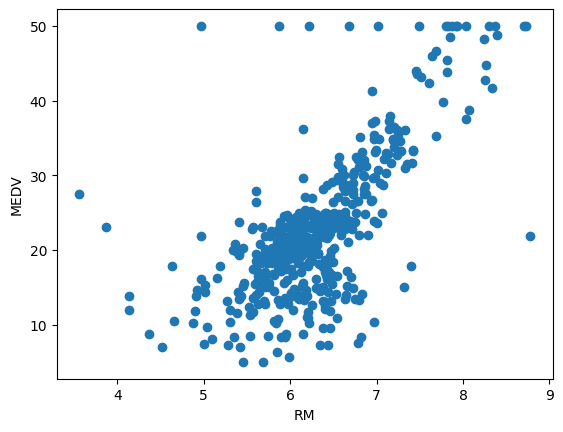

In [8]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

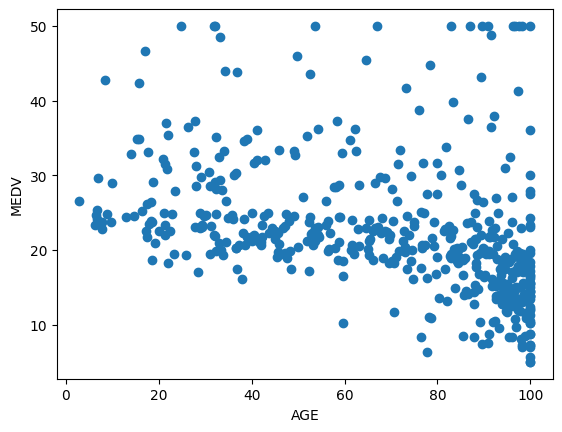

In [9]:
plt.scatter(df['AGE'], df['MEDV'])
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
features = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

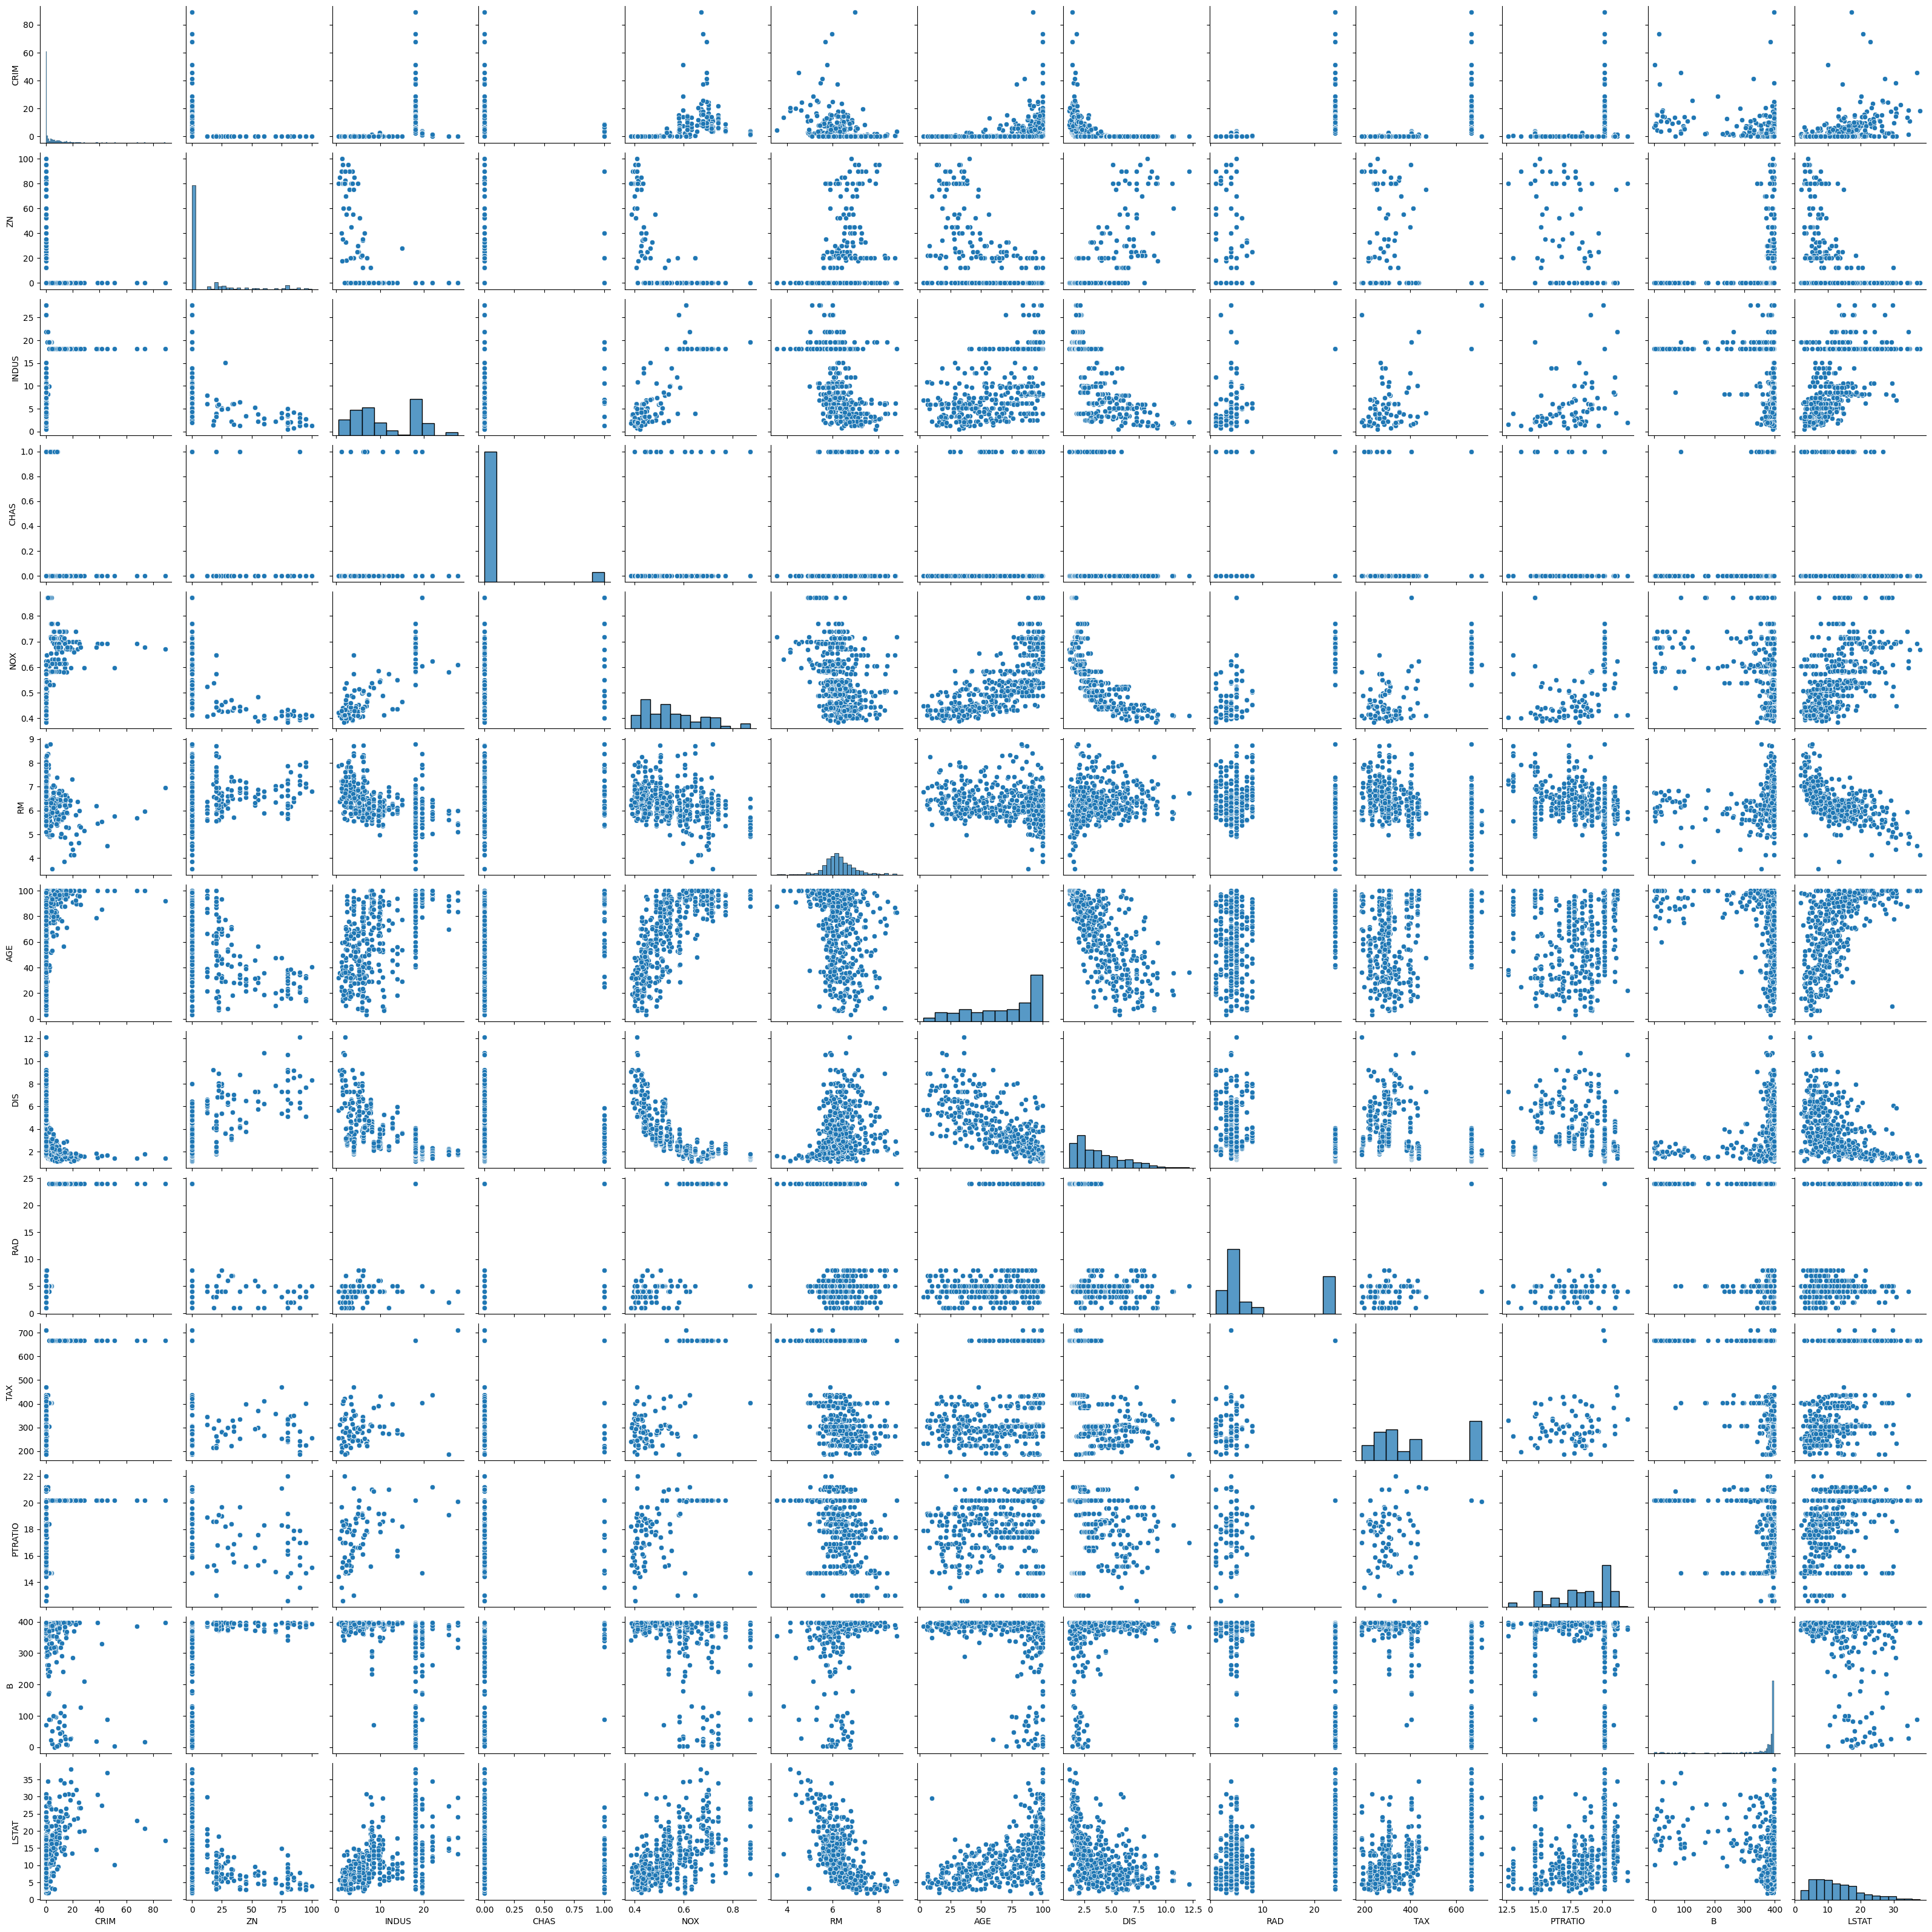

In [12]:
sns.pairplot(features)

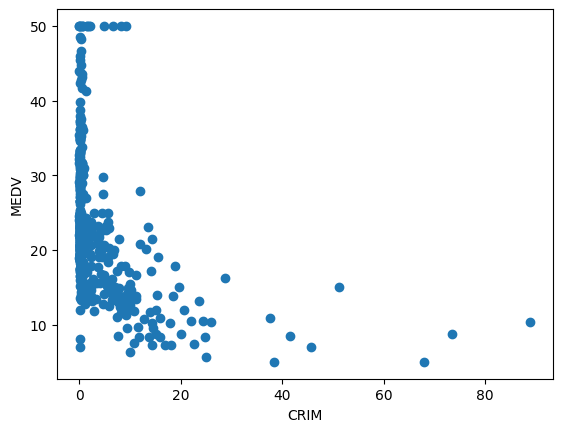

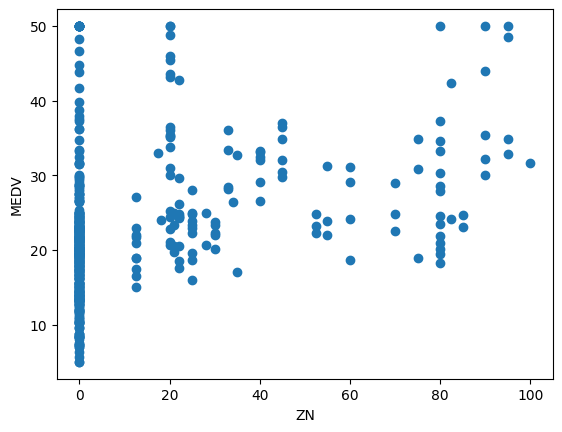

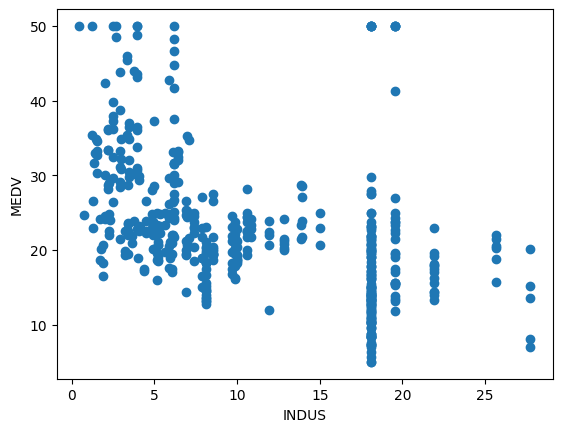

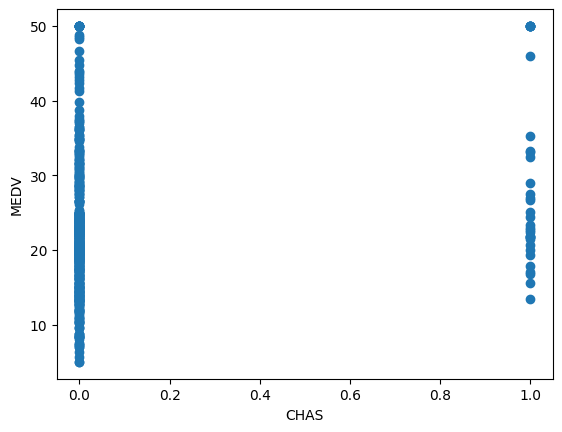

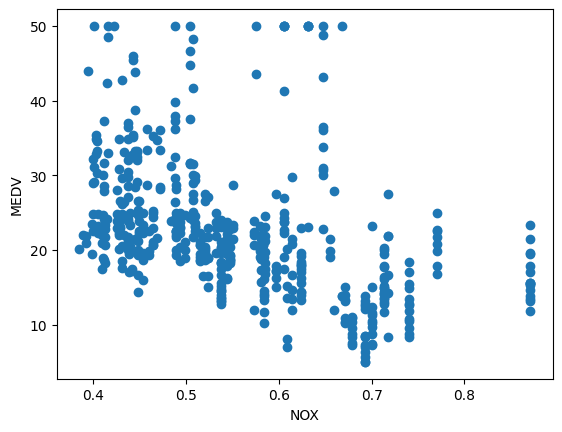

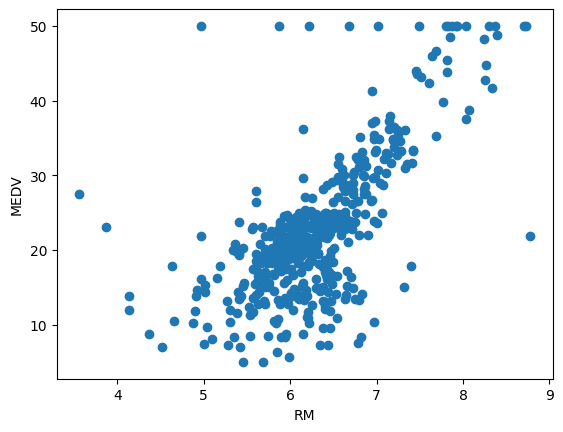

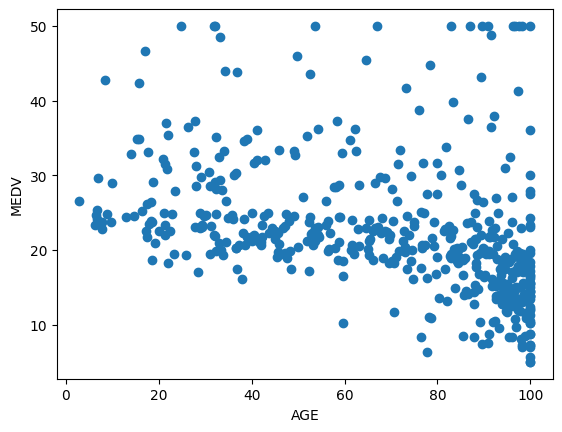

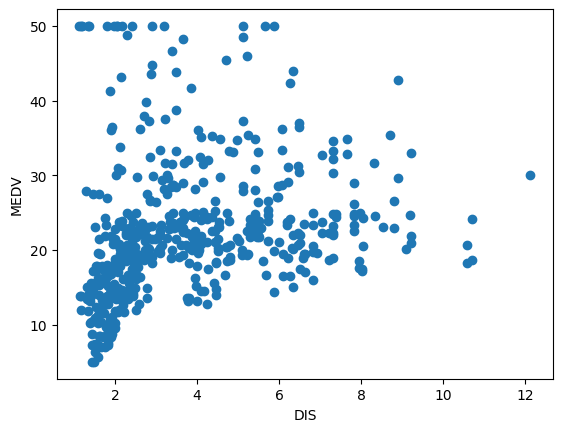

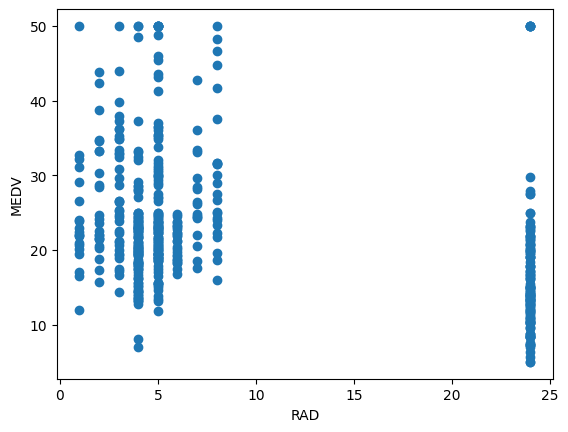

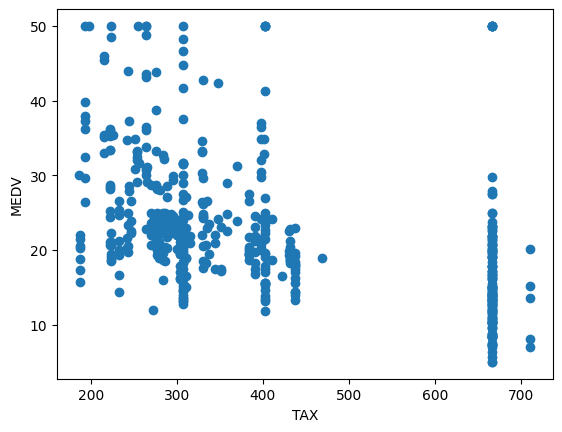

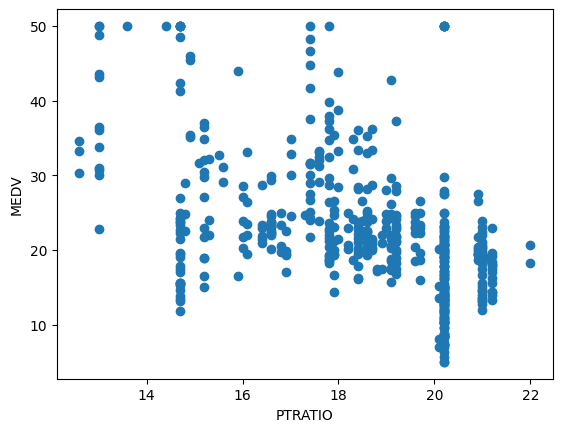

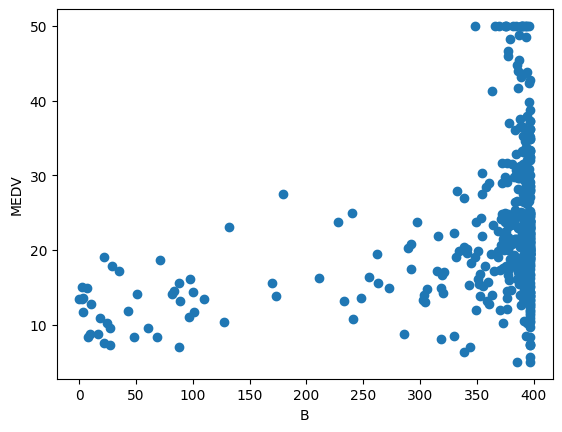

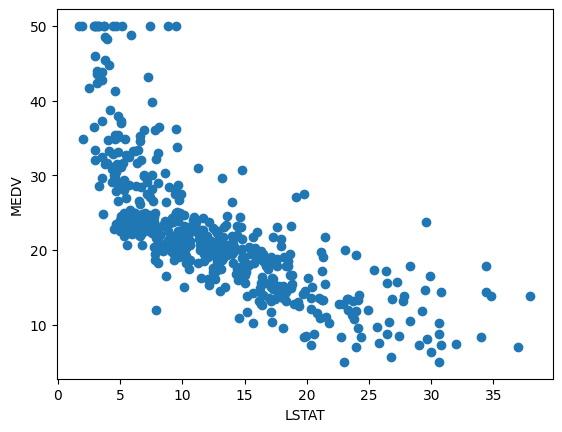

In [13]:
for col in features.columns:

    plt.scatter(df[col], df['MEDV'])
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()
    
    print('\n')

In [57]:
x = df[['DIS']].values.reshape(-1, 1)
x.shape

(506, 1)

In [58]:
y = df[['MEDV']].values.reshape(-1, 1)
y.shape

(506, 1)

In [59]:
# min-max scaling
def get_scaled_feature(X: np.array):
    mn = np.min(X, axis=0)
    mx = np.max(X, axis=0)
    
    return (X - mn) / (mx - mn)

In [60]:
x = get_scaled_feature(X=x)
x.shape

(506, 1)

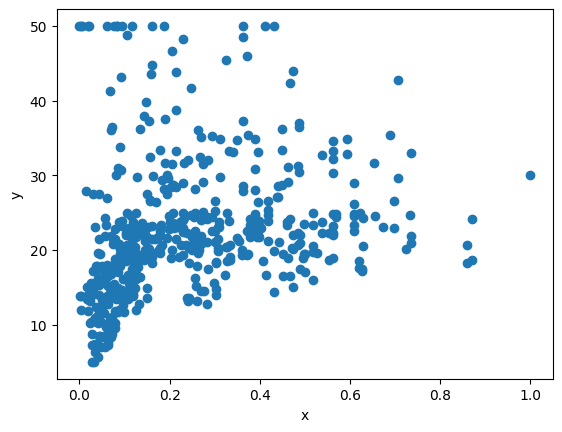

In [61]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [62]:
x_sqrt = np.sqrt(x)

In [63]:
x_sqrt.shape

(506, 1)

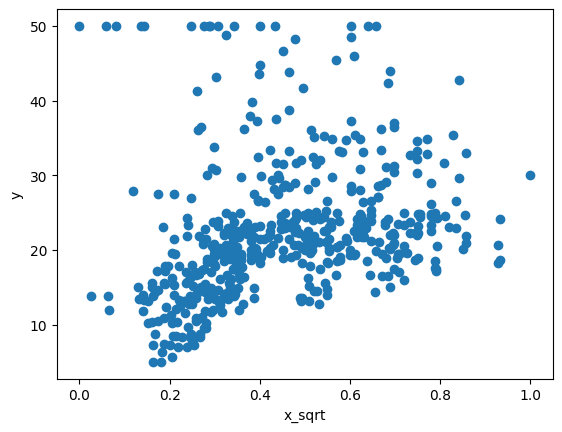

In [64]:
plt.scatter(x_sqrt, y)
plt.xlabel('x_sqrt')
plt.ylabel('y')
plt.show()

In [65]:
poly = PolynomialFeatures(degree=9)
X = poly.fit_transform(x.reshape(-1, 1))
X.shape

(506, 10)

In [66]:
X = np.hstack((X, x_sqrt))

In [67]:
X.shape, y.shape

((506, 11), (506, 1))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=47)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 11), (127, 11), (379, 1), (127, 1))

In [70]:
theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
theta

array([[-0.151923],
       [-0.718941],
       [-0.201673],
       [-0.689141],
       [-0.303428],
       [-0.493847],
       [-0.789206],
       [-0.337767],
       [-0.344882],
       [-0.31521 ],
       [-0.794707]])

In [71]:

def cost_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./2*m) * np.sum(diff**2)
    
    return cost


def gradient_fn(theta: np.array, X: np.array, y: np.array, m: int=X_train.shape[0]):
    X = X.T
    y = y.T
    
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(X, diff.T)
    
    return gradient

In [72]:

def train(X_train, y_train, n_iterations: int=10000, lr: float=0.0001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X=X_train, y=y_train)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [73]:
n_iterations = 80000

opt_theta, cost = train(X_train=X_train, y_train=y_train, n_iterations=n_iterations)

The cost at 0th iteration is 45774451.94563223
Theta: [[-0.516089 -0.045681 -0.345452 -0.467714 -0.4465   -0.653339 -0.793144
  -0.086766 -0.408852 -0.279295 -0.806148]]
************************************************

The cost at 10th iteration is 45671293.07275398
Theta: [[-0.492645 -0.039581 -0.342999 -0.466464 -0.445757 -0.652846 -0.792787
  -0.08649  -0.408627 -0.279103 -0.795071]]
************************************************

The cost at 20th iteration is 45568400.66672948
Theta: [[-0.469231 -0.033489 -0.34055  -0.465215 -0.445015 -0.652354 -0.792431
  -0.086214 -0.408401 -0.278911 -0.784008]]
************************************************

The cost at 30th iteration is 45465774.03919152
Theta: [[-0.445847 -0.027405 -0.338105 -0.463969 -0.444274 -0.651862 -0.792075
  -0.085939 -0.408176 -0.278719 -0.77296 ]]
************************************************

The cost at 40th iteration is 45363412.50355116
Theta: [[-0.422493 -0.021329 -0.335662 -0.462724 -0.443535 -0.651371 

In [74]:
opt_theta

array([[17.914791],
       [ 4.220541],
       [ 0.739649],
       [-0.205214],
       [-0.413097],
       [-0.682057],
       [-0.832063],
       [-0.119053],
       [-0.429457],
       [-0.287361],
       [ 7.76684 ]])

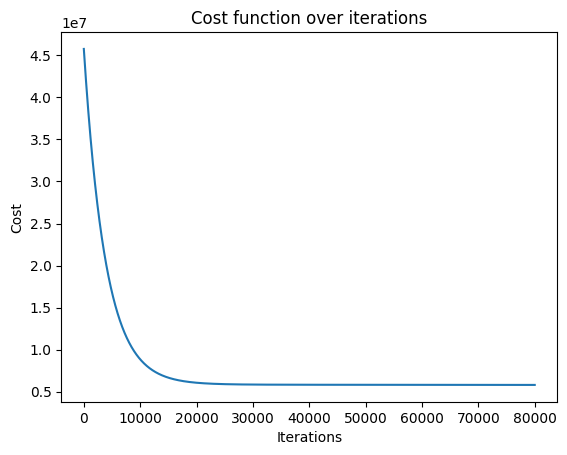

In [75]:
# Plot the cost over iterations
plt.plot(range(n_iterations), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [76]:
y_train_pred = np.dot(opt_theta.T, X_train.T)
y_train_pred.shape, y_train.shape

((1, 379), (379, 1))

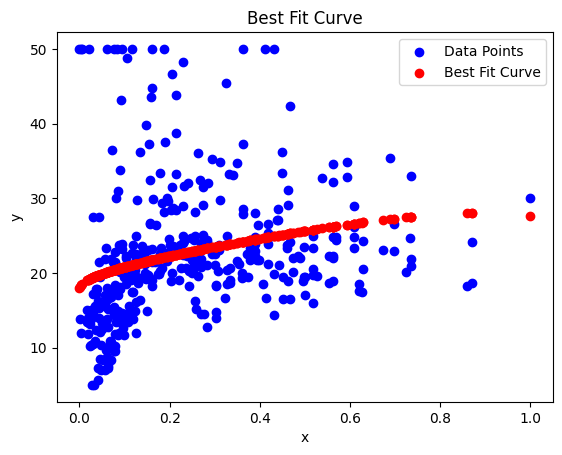

In [77]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

In [78]:
y_pred = np.dot(opt_theta.T, X_test.T)
y_pred.shape, y_test.shape

((1, 127), (127, 1))

In [79]:
diff = y_pred - y_test.T
sq_error = np.sum(diff**2)
mse = sq_error / y_test.shape[0]
mse

70.77079395210282

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
# using sklearn
mean_squared_error(y_pred=y_pred, y_true=y_test.T)

70.77079395210282

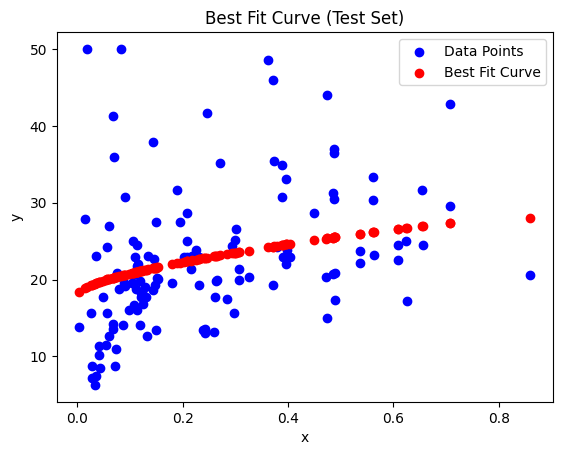

In [82]:
# Plot the original data points
plt.scatter(X_test[:, 1], y_test[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_test[:, 1], y_pred.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve (Test Set)')

# Show the legend
plt.legend()
plt.show()

##### Regularization

In [83]:



def train_with_regularization(X_train, y_train, n_iterations: int=10000, lr: float=0.0001, 
                            lambda_: float=0.1, m: int=X_train.shape[0]):
    
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X_train.shape[1], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_fn(theta=theta, X=X_train, y=y_train)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = gradient_fn(theta=theta, X=X_train, y=y_train)
        
        # calculate the fraction
        frac = lr * (lambda_/m)
        
        # update the theta 
        theta = theta * (1 - frac) - (lr * gradient)
    
    return theta, np.array(costs)

In [84]:
n_iterations = 100000

theta_regularized, cost_regularized = train_with_regularization(X_train=X_train, 
                                                                y_train=y_train, 
                                                                n_iterations=n_iterations,
                                                                lambda_=0.0001
                                                                )

The cost at 0th iteration is 44926568.09448774
Theta: [[-0.347712 -0.97664  -0.642068 -0.096263 -0.572959 -0.797034 -0.234663
  -0.903878 -0.951465 -0.362401 -0.060242]]
************************************************

The cost at 10th iteration is 44825555.2780365
Theta: [[-0.324526 -0.970588 -0.639627 -0.095015 -0.572215 -0.796538 -0.234303
  -0.903599 -0.951235 -0.362205 -0.049269]]
************************************************

The cost at 20th iteration is 44724803.39079398
Theta: [[-0.301369 -0.964543 -0.637189 -0.093768 -0.571472 -0.796043 -0.233943
  -0.903319 -0.951006 -0.36201  -0.03831 ]]
************************************************

The cost at 30th iteration is 44624311.75869734
Theta: [[-0.278242 -0.958506 -0.634755 -0.092523 -0.570729 -0.795548 -0.233584
  -0.90304  -0.950778 -0.361815 -0.027365]]
************************************************

The cost at 40th iteration is 44524079.70942505
Theta: [[-0.255145 -0.952477 -0.632324 -0.091279 -0.569988 -0.795054 -

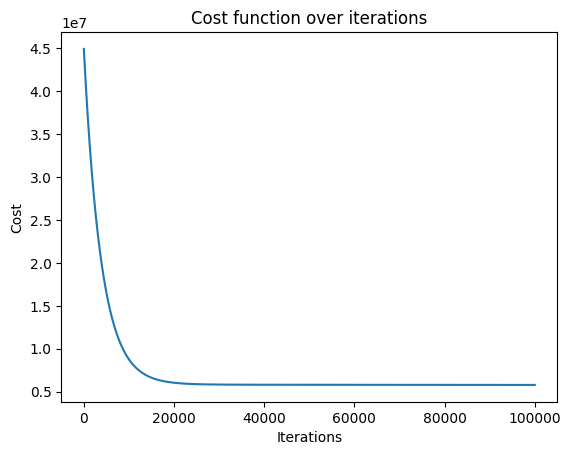

In [85]:
# Plot the cost over iterations
plt.plot(range(n_iterations), cost_regularized)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

In [86]:
y_train_pred_reg = np.dot(theta_regularized.T, X_train.T)
y_train_pred_reg.shape, y_train.shape

((1, 379), (379, 1))

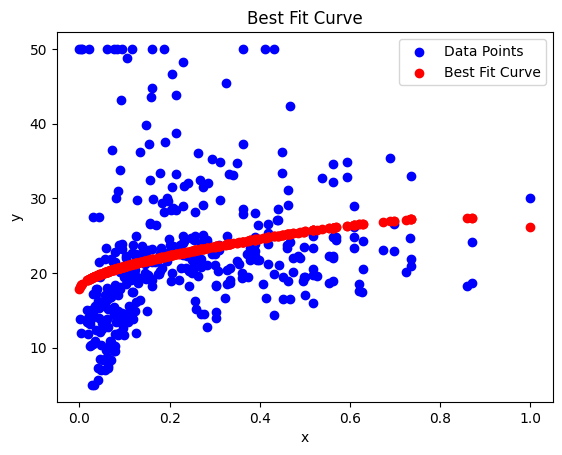

In [87]:
# Plot the original data points
plt.scatter(X_train[:, 1], y_train[:, 0], color='blue', label='Data Points')

# Plot the best fit line
plt.scatter(X_train[:, 1], y_train_pred_reg.T, color='red', label='Best Fit Curve')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Curve')

# Show the legend
plt.legend()
plt.show()

In [105]:
# optimal theta with regularization
theta_regularized

array([[17.844928],
       [ 3.280201],
       [ 0.353286],
       [ 0.087316],
       [-0.591109],
       [-0.854437],
       [-0.285651],
       [-0.936344],
       [-0.963594],
       [-0.355526],
       [ 8.534382]])

In [104]:
# optimal theta without regularization
opt_theta

array([[17.914791],
       [ 4.220541],
       [ 0.739649],
       [-0.205214],
       [-0.413097],
       [-0.682057],
       [-0.832063],
       [-0.119053],
       [-0.429457],
       [-0.287361],
       [ 7.76684 ]])

##### Using Sklearn

In [103]:
## using sklearn

model = LinearRegression()

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [40.773002]
Coefficient: [-2.956301e+02  1.430895e+04 -1.325199e+05  6.236560e+05 -1.704300e+06
  2.808765e+06 -2.748238e+06  1.468234e+06 -3.294671e+05 -1.533074e+02]


In [106]:
from sklearn.linear_model import SGDRegressor

In [107]:
model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.0001)

# Fit the model
model.fit(X_train[:, 1:], y_train)

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: [17.903505]
Coefficient: [ 3.697284  0.443466 -0.27039  -0.384327 -0.359076 -0.306535 -0.254561
 -0.209363 -0.171409  8.118781]
